# MACHINE LEARNING MODELLING

- **this modelling purposes is to find the highest recall score**
- **to reduce the type of error of machine which predicted not interested but actual interested.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

from sklearn import set_config
set_config(print_changed_only=False)




from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score,f1_score,accuracy_score

In [2]:
df = pd.read_csv('insurance_cleaned.csv',index_col=0)

In [3]:
df.head()

,Id,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,NoOfContacts,DaysPassed,...,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed
0,1,0,3,0,0,1,0,0,2,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,2,0,0,1,0,1,5,0,...,1,0,0,0,0,0,0,0,0,0
2,3,0,3,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,4,0,2,0,0,1,0,1,2,0,...,0,0,0,0,0,0,0,1,0,0
4,5,1,3,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
num_top10_corr = df.corr()['CarInsurance'].sort_values(ascending=False).head(20).to_frame()
cm = sns.light_palette("blue", as_cmap=True)
s = num_top10_corr.style.background_gradient(cmap=cm)
s

,CarInsurance
CarInsurance,1.000000
duration_status,0.417036
Outcome,0.189184
PrevAttempts,0.149010
Job_retired,0.097855
Job_student,0.097809
DaysPassed,0.089366
Job_unemployed,0.069130
Education,0.062102
Balance,0.056367


## SPLITTING DATA

In [5]:
X= df.drop(['CarInsurance'],axis=1)
y= df['CarInsurance']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify = y)

In [7]:
X_train.shape,X_test.shape

((2239, 26), (560, 26))

## BASE MODEL

### LOGISTIC REGRESSION

In [14]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
LR_train_pred = LR_model.predict(X_train)
LR_test_pred = LR_model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train,LR_train_pred)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,LR_test_pred)*100))
print(classification_report(y_test, LR_test_pred))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test,LR_test_pred))

Train Set Accuracy:74.497543546226
Test Set Accuracy:73.03571428571428
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       317
           1       0.72      0.62      0.67       243

    accuracy                           0.73       560
   macro avg       0.73      0.72      0.72       560
weighted avg       0.73      0.73      0.73       560


Confusion Matrix:
[[258  59]
 [ 92 151]]


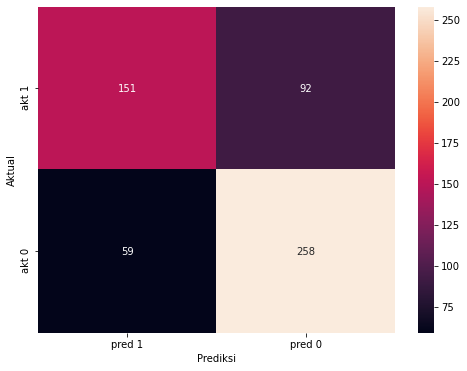

In [10]:
cm_LR = confusion_matrix(y_test, LR_test_pred, labels=[1,0])
df_LR = pd.DataFrame(data=cm_LR, index=['akt 1', 'akt 0'], columns=['pred 1', 'pred 0'])
sns.heatmap(df_LR, annot=True, fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

- FN 92 dan FP 59
- FP Machine predicted customer do not want to  buy the actual is want to buy
- FN Machine predicted customer want to  buy the actual is do not want to buy

### Random Forest Classifier

In [13]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
RF_train_pred = RF_model.predict(X_train)
RF_test_pred = RF_model.predict(X_test)
RF_cm = confusion_matrix(y_test, RF_test_pred)


print("Train Set Accuracy:"+str(accuracy_score(y_train,RF_train_pred)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,RF_test_pred)*100))
print(classification_report(y_test, RF_test_pred))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test,RF_test_pred))

Train Set Accuracy:100.0
Test Set Accuracy:75.89285714285714
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       317
           1       0.73      0.70      0.72       243

    accuracy                           0.76       560
   macro avg       0.76      0.75      0.75       560
weighted avg       0.76      0.76      0.76       560


Confusion Matrix:
[[255  62]
 [ 73 170]]


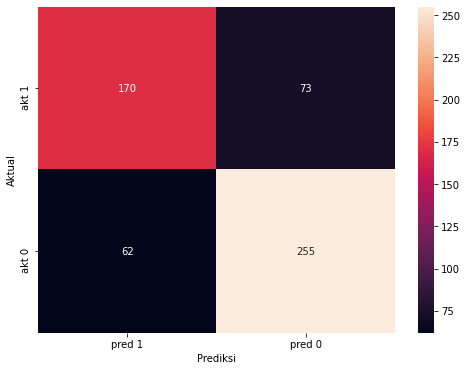

In [19]:
RF_cm = confusion_matrix(y_test, RF_test_pred, labels=[1,0])
df_RF = pd.DataFrame(data=RF_cm, index=['akt 1', 'akt 0'], columns=['pred 1', 'pred 0'])
sns.heatmap(df_RF, annot=True, fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

- FN 73 dan FP 62
- FP Machine predicted customer do not want to  buy the actual is want to buy
- FN Machine predicted customer want to  buy the actual is do not want to buy

### XGB Classsifier

In [17]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train)
XGB_train_pred = XGB_model.predict(X_train)
XGB_test_pred = XGB_model.predict(X_test)
XGB_cm = confusion_matrix(y_test, XGB_test_pred)


print("Train Set Accuracy:"+str(accuracy_score(y_train,XGB_train_pred)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,XGB_test_pred)*100))
print(classification_report(y_test, XGB_test_pred))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test,XGB_test_pred))

Train Set Accuracy:82.04555605180884
Test Set Accuracy:76.42857142857142
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       317
           1       0.72      0.76      0.74       243

    accuracy                           0.76       560
   macro avg       0.76      0.76      0.76       560
weighted avg       0.77      0.76      0.76       560


Confusion Matrix:
[[244  73]
 [ 59 184]]


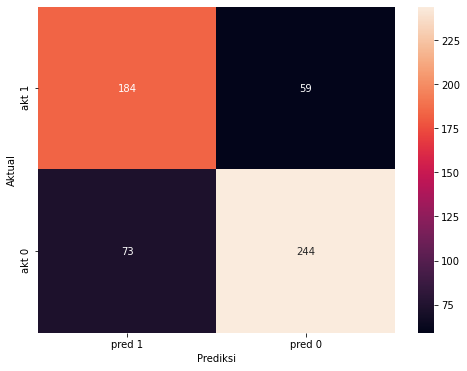

In [18]:
XGB_cm = confusion_matrix(y_test, XGB_test_pred, labels=[1,0])
df_XGB = pd.DataFrame(data=XGB_cm, index=['akt 1', 'akt 0'], columns=['pred 1', 'pred 0'])
sns.heatmap(df_XGB, annot=True, fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

- FN 59 dan FP 73
- FP Machine predicted customer do not want to  buy the actual is want to buy
- FN Machine predicted customer want to  buy the actual is do not want to buy

# HYPERPARAMETER TUNING

### LOGISTIC REGRESSION TUNED

In [22]:
LR = LogisticRegression()


In [23]:
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# param_LR = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
#             'max_iter': [100,200,1000],
#             'C': [1],
#             'tol': [0.0001,0.0005]
#            }

In [24]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga']
max_iter = [1, 10, 100, 1000]


# simpan dalam variabel dengan nama 'param'
param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000]}

In [25]:
Tune_LR = GridSearchCV(LR, param_grid=param, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
Tune_LR.fit(X_train, y_train) 

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 377 out of 400 | elapsed:   13.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   18.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_iter': [1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinier', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='rec

In [26]:
Tune_LR.best_params_

{'max_iter': 1000, 'penalty': 'none', 'solver': 'lbfgs'}

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       317
           1       0.71      0.65      0.68       243

    accuracy                           0.74       560
   macro avg       0.73      0.73      0.73       560
weighted avg       0.73      0.74      0.73       560



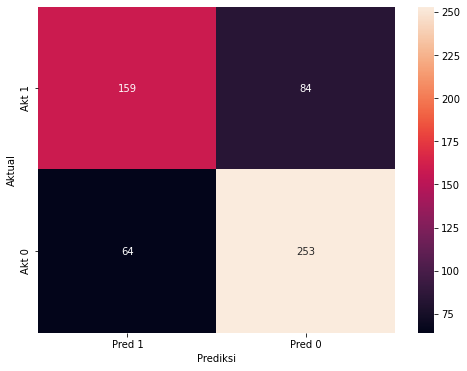

In [27]:
model_Tune_LR = Tune_LR.best_estimator_
y_tuned_lr = model_Tune_LR.predict(X_test)
cm_tuned_lr = confusion_matrix(y_test, y_tuned_lr, labels=[1,0])
df_tuned_lr = pd.DataFrame(data=cm_tuned_lr, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tuned_lr));
sns.heatmap(df_tuned_lr, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

### RANDOM FOREST CLASSIFIER TUNED

In [80]:
RF_tuned = RandomForestClassifier()
# # param_RF = {'n_estimators': [100,2000,5000],
#             'max_depth': [None,5,7,8],
#             'min_samples_split': [2,10,20],
#             'max_features': ['auto',5],
#            }

In [81]:
RF_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [82]:
param_RF = {"n_estimators" : [100, 200, 500, 1000,2000],
          "max_depth" : [None, 5, 7, 9, 10],
          "min_samples_split" : [2, 9, 15, 25],
          "min_samples_leaf" : [1, 2, 5, 10],
          "max_features" : ['auto',.5, .8, .7, .6]}

In [83]:
model_RF = RandomizedSearchCV(RF_tuned, param_distributions=param_RF, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
model_RF.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [84]:
model_RF.best_params_

{'n_estimators': 500,
 'min_samples_split': 25,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 10}

In [ ]:
# {'n_estimators': 2000,
#  'min_samples_split': 20,
#  'max_features': 'auto',
#  'max_depth': None}


              precision    recall  f1-score   support

           0       0.82      0.75      0.79       317
           1       0.71      0.79      0.75       243

    accuracy                           0.77       560
   macro avg       0.77      0.77      0.77       560
weighted avg       0.77      0.77      0.77       560



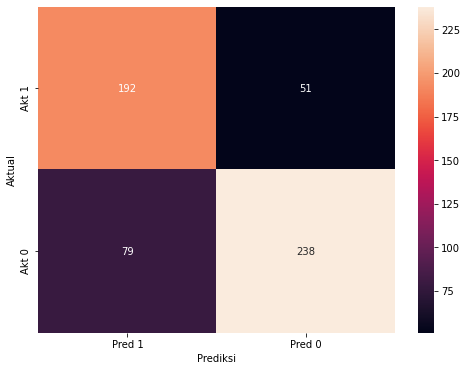

In [85]:
model_tuned_RF = model_RF.best_estimator_
y_tune_rf = model_tuned_RF.predict(X_test)
cm_tune_rf = confusion_matrix(y_test, y_tune_rf, labels=[1,0])
df_tune_rf = pd.DataFrame(data=cm_tune_rf, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_rf));
sns.heatmap(df_tune_rf, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

- FN 51 dan FP 79
- FP Machine predicted customer do not want to  buy the actual is want to buy
- FN Machine predicted customer want to  buy the actual is do not want to buy

### XGB CLASSIFIER TUNED


In [86]:
XGB_Tuned = XGBClassifier()
# param_xgb = {'max_depth': [6,1],
#              'learning_rate': [0.300000012,0.600000012] , 
#              'n_estimators': [1000], 
#              'gamma': [0,.5], 
#              'colsample_bytree': [1,0.5],
#              'subsample': [1], 
#              'reg_alpha':[0,0.5] ,
#              'reg_lambda': [1,0.8]}

In [41]:
n_estimators=[10,50,100,200,300]
max_depth=[2,3,4,5]
learning_rate=[0.1,0.01]
colsample_bytree=[0.5,0.6,0.7]
min_child_weight=[1,2,3]
gamma=[0.001,0.01,0.1]
subsample=[0.6,0.7,0.8]

param_xgb=dict(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate,
                colsample_bytree=colsample_bytree,min_child_weight=min_child_weight,gamma=gamma,subsample=subsample)

In [42]:
model_XGB = RandomizedSearchCV(XGB_Tuned, param_distributions=param_xgb, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
model_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7],
                                        '

In [43]:
model_XGB.best_params_

{'subsample': 0.7,
 'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 0.01,
 'colsample_bytree': 0.7}

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       317
           1       0.72      0.77      0.74       243

    accuracy                           0.77       560
   macro avg       0.77      0.77      0.77       560
weighted avg       0.77      0.77      0.77       560



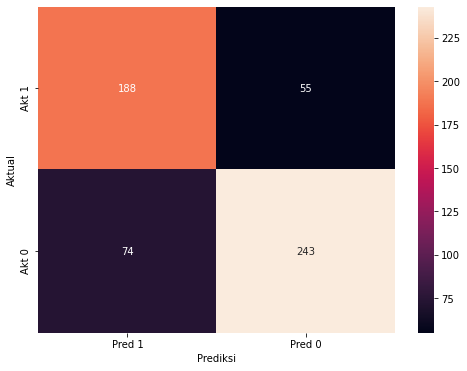

In [44]:
model_tuned_XGB = model_XGB.best_estimator_
y_tune_xgb = model_tuned_XGB.predict(X_test)
cm_tune_xgb = confusion_matrix(y_test, y_tune_xgb, labels=[1,0])
df_tune_xgb = pd.DataFrame(data=cm_tune_xgb, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_xgb));
sns.heatmap(df_tune_xgb, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

- FN 55 dan FP 74
- FP Machine predicted customer do not want to  buy the actual is want to buy
- FN Machine predicted customer want to  buy the actual is do not want to buy

In [64]:
y_tune_xgb_train = model_tuned_XGB.predict(X_train)
print(accuracy_score(y_train, y_tune_xgb_train))
print(accuracy_score(y_test, y_tune_xgb))

0.8164359088878964
0.7696428571428572


In [87]:
LRbase = recall_score(y_test, LR_test_pred)
RF_base = recall_score(y_test, RF_test_pred)
XGB_base = recall_score(y_test, XGB_test_pred)
LR_tuned = recall_score(y_test, y_tuned_lr)
RF_tuned = recall_score(y_test, y_tune_rf)
XGB_tuned = recall_score(y_test, y_tune_xgb)

In [88]:
data={
    'LR': [LRbase],
    'RF': [RF_base],
    'XGB': [XGB_base],
    'LR_tuned': [LR_tuned],
    'RF_tuned': [RF_tuned],
    'XGB_tuned': [XGB_tuned]
}

(pd.DataFrame(data, index=['Recall Score']).T).sort_values('Recall Score',ascending=False)

,Recall Score
RF_tuned,0.790123
XGB_tuned,0.773663
XGB,0.757202
RF,0.699588
LR_tuned,0.654321
LR,0.621399


# Model Conclusion

1. **The highest recall score is RF Tuned, comparing to the other model**
{'n_estimators': 500,
 'min_samples_split': 25,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 10}



# Business Conclusion
1. The longer the conversations on the phone, the higher interest the customer will show to buy the insurance
2. People who have loaned a car, do not want to buy 
3. Marketing is focusing contact the next customer by celullar instead of telephone. People these days is always using their cellphone instead of staying at home and respond to telephone call at home.
4. higher education is most likely to buy insurance, and tertiary education is the highest rate who buy insurance
5. most distributed data is on may
6. compared to months contacted, on March, September, October, and December is the highest rate to buy insurance.
7. probably the previous marketing is targeting in these months period
8. Married people are most likely to buy car insurance, but the highest ratio is single status followed by divorced.
9. Probably, when single and divorced, they have a saving amounts compare to married who need more Saving
10. Management is the most frequent job



# SUGGESTION
1. Bank should target people who already retired, still students, and unemployed, with single status(marital).
2. The longer the conversations on the phone, the higher interest the customer will show to buy the insurance


# DEPLOY


In [90]:
import joblib

In [91]:
joblib.dump(RF_tuned, 'CarInsuranceModel_2')

['CarInsuranceModel_2']